In [171]:
import cvxpy as cp
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.linalg import hilbert
import time

In [172]:
plt.style.use(['dark_background'])

# Q 9:

In [28]:
A = np.array([[-1,0.4,0.8],[1,0,0],[0,1,0]])
# A_ = np.array(A).reshape(3,1)
b = np.array([1,0,0.3])
b_ = np.array(b).reshape(3,1)
x_des = np.array([7,2,-6])
x_des_ = np.array(x_des).reshape(3,1)
N = 30

for i in range(N-1):
    if i == 0:
        H, temp = b_, b_
    temp = np.dot(A,temp)
    H = np.concatenate((temp,H),1)
    
t, u = cp.Variable(N), cp.Variable(N)
prob = cp.Problem(cp.Minimize(np.ones(N)@t),[
    u <= t,
    -u <= t,
    u <= 0.5 * (t+1),
    -u <= 0.5 * (t+1),
    H * u == x_des
])
prob.solve()


C:\Users\sherw\anaconda3\envs\pip\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 9 times so far.

  warnings.warn(msg, UserWarning)


17.323567853890694

In [22]:
print(f'optimal value is as follows:\n{prob.value}\n'\
      ,f'optimal point is as follows:\n{t.value}')

optimal value is as follows:
17.323567853890694
 optimal point is as follows:
[-3.58589859e-11 -3.06073695e-11  1.25789129e-09  1.00000000e+00
  1.00000000e+00  1.00000000e+00  6.17798481e-12 -4.16078206e-11
 -2.62306116e-12  1.00000000e+00  1.00000000e+00  1.00000000e+00
  2.46624155e-01 -3.14831421e-11 -3.90765007e-11  1.01410960e-10
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.25374829e-11
 -4.16082163e-11 -3.53429556e-11  1.00000000e+00  6.98881473e-01
  1.00000000e+00 -8.80602338e-12  1.36527074e-09  1.56960048e-11
 -4.57250850e-11  5.37806222e+00]


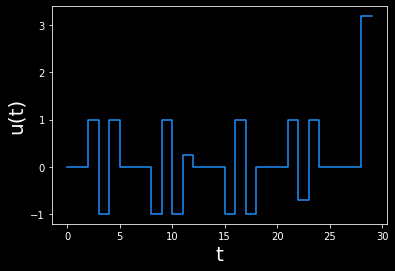

In [23]:
plt.step(np.linspace(0, N-1, N), u.value,c = 'dodgerblue')
plt.xlabel('t',size = 20)
plt.ylabel('u(t)',size = 20)

plt.show()

# Q 10:

In [318]:
def A_mat(n, i, eps = 0):
    if i == 1:
        return diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray() + eps
    if i == 2:
        return hilbert(n) + eps

def con_grad(n, i, eps = 0):
    t1 = time.time()
    x = np.zeros(n)
    b = np.ones(n)
    A = A_mat(n,i,eps)
    r = A @ x - b
    p = -r
    rsold = r.T @ r
    
    for iterr in range(len(b)):
        Ap = A @ p
        alpha = rsold / (p.T @ Ap)
        x = x + (alpha * p)
        r = r + (alpha * Ap)
        rsnew = r.T @ r
        if np.sqrt(rsnew) < 1e-8:
            break
        p = -r + (rsnew/rsold)*p
        rsold = rsnew
    res = LA.norm(A@x-b)
    t2 = time.time()
    t = t2-t1
    return x, res, t

# a:

In [326]:
# Part A

N = [100, 400, 1600]
I = [1, 2]
xss = []
print('Part \'A\':')

for i in I:
  for n in N:
    xs, res, exec_time = con_grad(n, i)
    xss.append(xs)
    print(f"\ni = {i} & n = {n}:")
    print(f"|Ax - b| l2-norm = {res:.5f}")
    print(f"execution time = {exec_time:.4f}")

Part 'A':

i = 1 & n = 100:
|Ax - b| l2-norm = 0.00000
execution time = 0.0030

i = 1 & n = 400:
|Ax - b| l2-norm = 0.00000
execution time = 0.0020

i = 1 & n = 1600:
|Ax - b| l2-norm = 0.00000
execution time = 0.0239

i = 2 & n = 100:
|Ax - b| l2-norm = 0.11533
execution time = 0.0090

i = 2 & n = 400:
|Ax - b| l2-norm = 0.00185
execution time = 0.0229

i = 2 & n = 1600:
|Ax - b| l2-norm = 0.06461
execution time = 0.7321


# b:

In [327]:
# Part B

eps = 1e-6 
xshats = []
print('\nPart \'B\':')
counter = 0

for i in I:
    for n in N:
        xshat, res, exec_time = con_grad(n, i, eps)
        xshats.append(xshat)
        print(f"\ni = {i} & n = {n}:")
        print(f"|Ax - b| l2-norm = {res:.5f}")
        n_A = n*eps
        print(f"|A - A_hat| l2-norm = {n_A:.4f}")
        n_x = LA.norm(xss[counter] - xshats[counter])
        print(f"|xs - xs_hat| l2-norm = {n_x:.5f}")
        print(f"execution time = {exec_time:.4f}")
        counter += 1


Part 'B':

i = 1 & n = 100:
|Ax - b| l2-norm = 0.00000
|A - A_hat| l2-norm = 0.0001
|xs - xs_hat| l2-norm = 0.00025
execution time = 0.0040

i = 1 & n = 400:
|Ax - b| l2-norm = 0.00000
|A - A_hat| l2-norm = 0.0004
|xs - xs_hat| l2-norm = 0.00199
execution time = 0.0020

i = 1 & n = 1600:
|Ax - b| l2-norm = 0.00000
|A - A_hat| l2-norm = 0.0016
|xs - xs_hat| l2-norm = 0.01597
execution time = 0.0244

i = 2 & n = 100:
|Ax - b| l2-norm = 0.05469
|A - A_hat| l2-norm = 0.0001
|xs - xs_hat| l2-norm = 8922.29148
execution time = 0.0098

i = 2 & n = 400:
|Ax - b| l2-norm = 0.00408
|A - A_hat| l2-norm = 0.0004
|xs - xs_hat| l2-norm = 97108.95613
execution time = 0.0229

i = 2 & n = 1600:
|Ax - b| l2-norm = 0.09942
|A - A_hat| l2-norm = 0.0016
|xs - xs_hat| l2-norm = 12624251.49666
execution time = 0.7162
